In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.autonotebook import tqdm
from postdocsalary.paths import DATA_DIR, ensure_dir
import urllib.request
pd.options.display.max_columns = None


<ipython-input-2-214c2f57db01>:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
salary_loc = DATA_DIR/"H1B_salaries"

In [4]:
salary_xlsx = list(salary_loc.glob("*.xlsx"))

In [23]:
jobs_list = []
for i in tqdm(salary_xlsx[::-1]):
    print("loading: {}".format(i))
    excel_doc = pd.read_excel(i)
    mask = np.array(['postdoctoral' in i.lower() for i in excel_doc.JOB_TITLE.values.astype(str)])
    postdoc_jobs = excel_doc[mask]
    #postdoc_jobs = postdoc_jobs[relevant_columns]
    jobs_list.append(postdoc_jobs)

  0%|          | 0/9 [00:00<?, ?it/s]

loading: /mnt/cube/tsainbur/Projects/github_repos/postdoc-salary/data/H1B_salaries/2020Q4.xlsx
loading: /mnt/cube/tsainbur/Projects/github_repos/postdoc-salary/data/H1B_salaries/2018.xlsx
loading: /mnt/cube/tsainbur/Projects/github_repos/postdoc-salary/data/H1B_salaries/2019.xlsx
loading: /mnt/cube/tsainbur/Projects/github_repos/postdoc-salary/data/H1B_salaries/2020Q1.xlsx
loading: /mnt/cube/tsainbur/Projects/github_repos/postdoc-salary/data/H1B_salaries/2015.xlsx
loading: /mnt/cube/tsainbur/Projects/github_repos/postdoc-salary/data/H1B_salaries/2020Q3.xlsx
loading: /mnt/cube/tsainbur/Projects/github_repos/postdoc-salary/data/H1B_salaries/2017.xlsx
loading: /mnt/cube/tsainbur/Projects/github_repos/postdoc-salary/data/H1B_salaries/2016.xlsx
loading: /mnt/cube/tsainbur/Projects/github_repos/postdoc-salary/data/H1B_salaries/2020Q2.xlsx


### Save as pickles for easy access later

In [27]:
for df, file in zip(jobs_list, salary_xlsx[::-1]):
    df.to_pickle(DATA_DIR/"H1B_salaries" / "{}.pickle".format(file.stem))

In [28]:
df[:3]

,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,BEGIN_DATE,END_DATE,TOTAL_WORKER_POSITIONS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,EMPLOYER_NAME,TRADE_NAME_DBA,EMPLOYER_ADDRESS1,EMPLOYER_ADDRESS2,EMPLOYER_CITY,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,EMPLOYER_COUNTRY,EMPLOYER_PROVINCE,EMPLOYER_PHONE,EMPLOYER_PHONE_EXT,NAICS_CODE,EMPLOYER_POC_LAST_NAME,EMPLOYER_POC_FIRST_NAME,EMPLOYER_POC_MIDDLE_NAME,EMPLOYER_POC_JOB_TITLE,EMPLOYER_POC_ADDRESS1,EMPLOYER_POC_ADDRESS2,EMPLOYER_POC_CITY,EMPLOYER_POC_STATE,EMPLOYER_POC_POSTAL_CODE,EMPLOYER_POC_COUNTRY,EMPLOYER_POC_PROVINCE,EMPLOYER_POC_PHONE,EMPLOYER_POC_PHONE_EXT,EMPLOYER_POC_EMAIL,AGENT_REPRESENTING_EMPLOYER,AGENT_ATTORNEY_LAST_NAME,AGENT_ATTORNEY_FIRST_NAME,AGENT_ATTORNEY_MIDDLE_NAME,AGENT_ATTORNEY_ADDRESS1,AGENT_ATTORNEY_ADDRESS2,AGENT_ATTORNEY_CITY,AGENT_ATTORNEY_STATE,AGENT_ATTORNEY_POSTAL_CODE,AGENT_ATTORNEY_COUNTRY,AGENT_ATTORNEY_PROVINCE,AGENT_ATTORNEY_PHONE,AGENT_ATTORNEY_PHONE_EXT,AGENT_ATTORNEY_EMAIL_ADDRESS,LAWFIRM_NAME_BUSINESS_NAME,STATE_OF_HIGHEST_COURT,NAME_OF_HIGHEST_STATE_COURT,WORKSITE_WORKERS,SECONDARY_ENTITY,SECONDARY_ENTITY_BUSINESS_NAME,WORKSITE_ADDRESS1,WORKSITE_ADDRESS2,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_TRACKING_NUMBER,PW_WAGE_LEVEL,PW_OES_YEAR,PW_OTHER_SOURCE,PW_OTHER_YEAR,PW_SURVEY_PUBLISHER,PW_SURVEY_NAME,TOTAL_WORKSITE_LOCATIONS,AGREE_TO_LC_STATEMENT,H-1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,STATUTORY_BASIS,APPENDIX_A_ATTACHED,PUBLIC_DISCLOSURE,PREPARER_LAST_NAME,PREPARER_FIRST_NAME,PREPARER_MIDDLE_INITIAL,PREPARER_BUSINESS_NAME,PREPARER_EMAIL
452,I-200-19358-215761,Certified,2019-12-24,2020-01-01,NaT,H-1B,Postdoctoral Associate,19-1042.00,"Medical Scientists, Except Epidemiologists",Y,2020-03-01,2022-02-28,1,1,0,0,0,0,0,Weill Cornell Medical College,Weill Cornell Medicine,1300 York Avenue,NaN,New York,NY,10065,UNITED STATES OF AMERICA,NaN,16469629247,NaN,611310,Huang,Jeanie,C.,"Manager, Immigration",575 Lexington Avenue,Suite 670,New York,NY,10022,UNITED STATES OF AMERICA,NaN,16469623623,NaN,jch2003@med.cornell.edu,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,N,NaN,413 E. 69th Street,NaN,New York,NEW YORK,NY,10021,52896.0,NaN,Year,49878.0,Year,NaN,I,7/1/2019 - 6/30/2020,NaN,NaN,NaN,NaN,1.0,Y,N,N,NaN,NaN,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
1299,I-200-19360-217097,Certified,2019-12-26,2020-01-02,NaT,H-1B,Postdoctoral Research Associate,19-2032.00,Materials Scientists,Y,2020-03-29,2021-03-28,1,0,1,0,0,0,0,University of Connecticut,NaN,Office of the General Counsel,"343 Mansfield Road, Unit 1177",Storrs,CT,6269,UNITED STATES OF AMERICA,NaN,18604865796,NaN,611310,Salafia,Lesley,Nicole,Senior Associate University Counsel,Office of the General Counsel,"343 Mansfield Road, Unit 1177",Storrs,CT,6269,UNITED STATES OF AMERICA,NaN,18604865796,NaN,lesley.salafia@uconn.edu,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,N,NaN,UNIVERSITY OF CONNECTICUT,UNIT 5233,Mansfield,MANSFIELD,CT,6269,51500.0,NaN,Year,42307.0,Year,NaN,I,7/1/2019 - 6/30/2020,NaN,NaN,NaN,NaN,1.0,Y,N,N,NaN,NaN,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
1435,I-200-19360-217405,Certified,2019-12-26,2020-01-02,NaT,H-1B,Postdoctoral Researcher,19-1042.00,"Medical Scientists, Except Epidemiologists",Y,2020-05-16,2023-05-15,1,0,0,1,0,0,0,UT Southwestern Medical Center,NaN,5323 Harry Hines Blvd,NaN,Dallas,TX,75390,UNITED STATES OF AMERICA,NaN,12146480010,NaN,611310,Thomas,Isha,NaN,Senior Immigration Specialist,5323 Harry Hines Blvd,NaN,Dallas,TX,75390,UNITED STATES OF AMERICA,NaN,12146480010,NaN,Isha.Thomas@utsouthwestern.edu,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,N,NaN,5323 Harry Hines Blvd,NaN,Dallas,DALLAS,TX,75390,52896.0,NaN,Year,43243.

### Merge

In [24]:
len(jobs_list)

9

In [154]:
relevant_columns = [
    "JOB_TITLE",
    
    "SOC_TITLE",
    "SOC_NAME",
    
    "FULL_TIME_POSITION",
    
    "CASE_SUBMITTED",
    "RECEIVED_DATE",
    "BEGIN_DATE",
    "EMPLOYMENT_START_DATE",
    "PERIOD_OF_EMPLOYMENT_START_DATE",
    
    #"TOTAL_WORKER_POSITIONS",
    "EMPLOYER_NAME",
    "EMPLOYER_BUSINESS_DBA",
    "EMPLOYER_CITY",
    "EMPLOYER_STATE",
    "EMPLOYER_POSTAL_CODE",
    "EMPLOYER_COUNTRY",
    "EMPLOYER_POC_LAST_NAME",
    "EMPLOYER_POC_FIRST_NAME",
    "EMPLOYER_POC_JOB_TITLE",
    #"STATE_OF_HIGHEST_COURT",
    #"NAME_OF_HIGHEST_STATE_COURT",
    #"WORKSITE_WORKERS",
    #"SECONDARY_ENTITY",
    #"SECONDARY_ENTITY_BUSINESS_NAME",
    "WORKSITE_CITY",
    "WORKSITE_COUNTY",
    "WORKSITE_STATE",
    "WORKSITE_POSTAL_CODE",
    
    "WAGE_RATE_OF_PAY_FROM",
    "WAGE_RATE_OF_PAY",
    
    "WAGE_RATE_OF_PAY_TO",
    "WAGE_UNIT_OF_PAY",
    "PREVAILING_WAGE",
    "PW_UNIT_OF_PAY",
    "PW_WAGE_LEVEL",
    "PUBLIC_DISCLOSURE",
]

In [148]:
def get_columns_subset(df):
    columns_in_df = [i for i in relevant_columns if (i in df.columns)]
    columns_in_df_i = [i for i in relevant_columns if (i+'_1' in df.columns) if i not in columns_in_df]
    
    for i in columns_in_df_i:
        df[i] = df[i+'_1']
        
    df = df[columns_in_df + columns_in_df_i]
    return df

In [149]:
salary_xlsx

[PosixPath('/mnt/cube/tsainbur/Projects/github_repos/postdoc-salary/data/H1B_salaries/2020Q2.xlsx'),
 PosixPath('/mnt/cube/tsainbur/Projects/github_repos/postdoc-salary/data/H1B_salaries/2016.xlsx'),
 PosixPath('/mnt/cube/tsainbur/Projects/github_repos/postdoc-salary/data/H1B_salaries/2017.xlsx'),
 PosixPath('/mnt/cube/tsainbur/Projects/github_repos/postdoc-salary/data/H1B_salaries/2020Q3.xlsx'),
 PosixPath('/mnt/cube/tsainbur/Projects/github_repos/postdoc-salary/data/H1B_salaries/2015.xlsx'),
 PosixPath('/mnt/cube/tsainbur/Projects/github_repos/postdoc-salary/data/H1B_salaries/2020Q1.xlsx'),
 PosixPath('/mnt/cube/tsainbur/Projects/github_repos/postdoc-salary/data/H1B_salaries/2019.xlsx'),
 PosixPath('/mnt/cube/tsainbur/Projects/github_repos/postdoc-salary/data/H1B_salaries/2018.xlsx'),
 PosixPath('/mnt/cube/tsainbur/Projects/github_repos/postdoc-salary/data/H1B_salaries/2020Q4.xlsx')]

In [156]:
for df, file in zip(jobs_list, salary_xlsx[::-1]):
    print(file.stem, [i for i in relevant_columns if (i not in df.columns) and (i+'_1' not in df.columns)])

2020Q4 ['SOC_NAME', 'RECEIVED_DATE', 'BEGIN_DATE', 'EMPLOYMENT_START_DATE', 'EMPLOYER_POC_LAST_NAME', 'EMPLOYER_POC_FIRST_NAME', 'EMPLOYER_POC_JOB_TITLE', 'WAGE_RATE_OF_PAY']
2018 ['SOC_TITLE', 'RECEIVED_DATE', 'BEGIN_DATE', 'PERIOD_OF_EMPLOYMENT_START_DATE', 'EMPLOYER_POC_LAST_NAME', 'EMPLOYER_POC_FIRST_NAME', 'EMPLOYER_POC_JOB_TITLE', 'WAGE_RATE_OF_PAY', 'PUBLIC_DISCLOSURE']
2019 ['SOC_NAME', 'RECEIVED_DATE', 'BEGIN_DATE', 'EMPLOYMENT_START_DATE', 'EMPLOYER_POC_LAST_NAME', 'EMPLOYER_POC_FIRST_NAME', 'EMPLOYER_POC_JOB_TITLE', 'WAGE_RATE_OF_PAY']
2020Q1 ['SOC_NAME', 'CASE_SUBMITTED', 'EMPLOYMENT_START_DATE', 'PERIOD_OF_EMPLOYMENT_START_DATE', 'EMPLOYER_BUSINESS_DBA', 'WAGE_RATE_OF_PAY']
2015 ['SOC_TITLE', 'RECEIVED_DATE', 'BEGIN_DATE', 'PERIOD_OF_EMPLOYMENT_START_DATE', 'EMPLOYER_BUSINESS_DBA', 'EMPLOYER_POC_LAST_NAME', 'EMPLOYER_POC_FIRST_NAME', 'EMPLOYER_POC_JOB_TITLE', 'WAGE_RATE_OF_PAY_FROM', 'WAGE_RATE_OF_PAY_TO', 'PUBLIC_DISCLOSURE']
2020Q3 ['SOC_NAME', 'CASE_SUBMITTED', 'EMPLOYM

In [161]:
[i.stem for i in salary_xlsx[::-1]]

['2020Q4',
 '2018',
 '2019',
 '2020Q1',
 '2015',
 '2020Q3',
 '2017',
 '2016',
 '2020Q2']

In [141]:
#"BEGIN_DATE",
#"EMPLOYMENT_START_DATE",
#"PERIOD_OF_EMPLOYMENT_START_DATE",

# "CASE_SUBMITTED",
#    "RECEIVED_DATE",

In [153]:
jobs_list[3][:3]

,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,BEGIN_DATE,END_DATE,TOTAL_WORKER_POSITIONS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,EMPLOYER_NAME,TRADE_NAME_DBA,EMPLOYER_ADDRESS1,EMPLOYER_ADDRESS2,EMPLOYER_CITY,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,EMPLOYER_COUNTRY,EMPLOYER_PROVINCE,EMPLOYER_PHONE,EMPLOYER_PHONE_EXT,NAICS_CODE,EMPLOYER_POC_LAST_NAME,EMPLOYER_POC_FIRST_NAME,EMPLOYER_POC_MIDDLE_NAME,EMPLOYER_POC_JOB_TITLE,EMPLOYER_POC_ADDRESS1,EMPLOYER_POC_ADDRESS2,EMPLOYER_POC_CITY,EMPLOYER_POC_STATE,EMPLOYER_POC_POSTAL_CODE,EMPLOYER_POC_COUNTRY,EMPLOYER_POC_PROVINCE,EMPLOYER_POC_PHONE,EMPLOYER_POC_PHONE_EXT,EMPLOYER_POC_EMAIL,AGENT_REPRESENTING_EMPLOYER,AGENT_ATTORNEY_LAST_NAME,AGENT_ATTORNEY_FIRST_NAME,AGENT_ATTORNEY_MIDDLE_NAME,AGENT_ATTORNEY_ADDRESS1,AGENT_ATTORNEY_ADDRESS2,AGENT_ATTORNEY_CITY,AGENT_ATTORNEY_STATE,AGENT_ATTORNEY_POSTAL_CODE,AGENT_ATTORNEY_COUNTRY,AGENT_ATTORNEY_PROVINCE,AGENT_ATTORNEY_PHONE,AGENT_ATTORNEY_PHONE_EXT,AGENT_ATTORNEY_EMAIL_ADDRESS,LAWFIRM_NAME_BUSINESS_NAME,STATE_OF_HIGHEST_COURT,NAME_OF_HIGHEST_STATE_COURT,WORKSITE_WORKERS,SECONDARY_ENTITY,SECONDARY_ENTITY_BUSINESS_NAME,WORKSITE_ADDRESS1,WORKSITE_ADDRESS2,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_TRACKING_NUMBER,PW_WAGE_LEVEL,PW_OES_YEAR,PW_OTHER_SOURCE,PW_OTHER_YEAR,PW_SURVEY_PUBLISHER,PW_SURVEY_NAME,TOTAL_WORKSITE_LOCATIONS,AGREE_TO_LC_STATEMENT,H-1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,STATUTORY_BASIS,APPENDIX_A_ATTACHED,PUBLIC_DISCLOSURE,PREPARER_LAST_NAME,PREPARER_FIRST_NAME,PREPARER_MIDDLE_INITIAL,PREPARER_BUSINESS_NAME,PREPARER_EMAIL
323,I-200-19268-221327,Certified,2019-09-25,2019-10-01,NaT,H-1B,POSTDOCTORAL ASSOCIATE,19-1012,FOOD SCIENTISTS AND TECHNOLOGISTS,Y,2020-01-01,2022-12-31,1,0,0,1,0,0,0,UNIVERSITY OF MARYLAND COLLEGE PARK,NaN,1126 H.J. PATTERSON,NaN,COLLEGE PARK,MD,20742,UNITED STATES OF AMERICA,NaN,3013145823,NaN,611310,JESSE LIRA,CONNIE,JEAN,ASSISTANT DIRECTOR FOR FACULTY AND SCHOLAR IMM...,1126 H.J. PATTERSON,NaN,COLLEGE PARK,MD,20742,UNITED STATES OF AMERICA,NaN,3013145823,NaN,CJL@UMD.EDU,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,US Department of Agriculture (USDA),"Bldg, 161, BARC (EAST), Powder Mill Road","10300 Baltimore Ave., BHNRC, ARS, USDA",Beltsville,Prince George's,MD,20705,64000.0,64000.0,Year,39125.0,Year,NaN,I,2019,OES,NaN,NaN,NaN,NaN,Y,N,N,NaN,NaN,NaN,Disclose Business,SONG,ELAINE,NaN,UNIVERSITY OF MARYLAND,SSONG1@UMD.EDU
881,I-200-19268-897672,Certified,2019-09-25,2019-10-01,NaT,H-1B,POSTDOCTORAL RESEARCHER,19-1042,"MEDICAL SCIENTISTS, EXCEPT EPIDEMIOLOGISTS",Y,2019-11-01,2022-10-31,1,1,0,0,0,0,0,UT SOUTHWESTERN MEDICAL CENTER,NaN,5323 HARRY HINES BLVD,NaN,DALLAS,TX,75390,UNITED STATES OF AMERICA,NaN,2146480010,NaN,611310,KASHAA,FAITH,NaN,SENIOR IMMIGRATION SPECIALIST,5323 HARRY HINES BLVD,NaN,DALLAS,TX,75390,UNITED STATES OF AMERICA,NaN,2146480010,NaN,FAITH.KASHAA@UTSOUTHWESTERN.EDU,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,5323 Harry Hines Blvd,NaN,Dallas,Dallas,TX,75390,52140.0,NaN,Year,43243.0,Year,NaN,I,2019,OES,NaN,NaN,NaN,NaN,Y,N,N,NaN,NaN,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
884,I-200-19268-911083,Certified,2019-09-25,2019-10-01,NaT,H-1B,POSTDOCTORAL RESEARCH ASSOCIATE,19-1042,"MEDICAL SCIENTISTS, EXCEPT EPIDEMIOLOGISTS",Y,2019-10-15,2021-06-30,1,1,0,0,0,0,0,THE UNIVERSITY OF GEORGIA,NaN,1324 SOUTH LUMPKIN ST.,OFFICE OF INTERNATIONAL EDUCATION,ATHENS,GA,30602,UNITED STATES OF AMERICA,NaN,7065422900,NaN,611310,HAAGEN,SANDY,NaN,INTERNATIONAL FACULTY & STAFF ADVISOR,1324 SOUTH LUMPKIN ST.,OFFICE OF INTERNATIONAL EDUCATION,ATHENS,GA,30602,UNITED STATES OF AMERICA,NaN,7065422900,NaN,SPHAAGEN@UGA.EDU,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [169]:
df_list = []
for df, file in zip(jobs_list, salary_xlsx[::-1]):
    print(len(df))
    df = get_columns_subset(df)
    
    # date
    if file.stem == '2020Q2':
        df['CASE_DATE'] = df["RECEIVED_DATE"]
    elif file.stem == '2016':
        df['CASE_DATE'] = df["CASE_SUBMITTED"]
    elif file.stem == '2017':
        df['CASE_DATE'] = df["CASE_SUBMITTED"]
    elif file.stem == '2020Q3':
        df['CASE_DATE'] = df["RECEIVED_DATE"]
    elif file.stem == '2015':
        df['CASE_DATE'] = df["CASE_SUBMITTED"]
    elif file.stem == '2020Q1':
        df['CASE_DATE'] = df["RECEIVED_DATE"]
    elif file.stem == '2019':
        df['CASE_DATE'] = df["CASE_SUBMITTED"]
    elif file.stem == '2018':
        df['CASE_DATE'] = df["CASE_SUBMITTED"]
    elif file.stem == '2020Q4':
        df['CASE_DATE'] = df["CASE_SUBMITTED"]
    
    print(df['CASE_DATE'].dtype)
    df['dataset'] = file.stem
    
    # base salary
    if file.stem == '2015':
        #break
        df['BASE_SALARY'] = [float(i.split('-')[0]) for i in df['WAGE_RATE_OF_PAY'].values]
    else:
        df['BASE_SALARY'] = df['WAGE_RATE_OF_PAY_FROM']
    
    df_list.append(df)
full_df = pd.concat(df_list)

5266
datetime64[ns]
4938
datetime64[ns]
5266
datetime64[ns]
1121
datetime64[ns]
5358
datetime64[ns]
1224
datetime64[ns]
5106
datetime64[ns]
5506
datetime64[ns]
1019
datetime64[ns]


<ipython-input-169-e6b999223127>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CASE_DATE'] = df["CASE_SUBMITTED"]
<ipython-input-169-e6b999223127>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dataset'] = file.stem
<ipython-input-169-e6b999223127>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [222]:
cpi.update()

In [223]:
# CPI goes up to 2019, so we set the inflation date here
full_df["INFLACTION_SCALED_BASE_SALARY"] = [
    cpi.inflate(
        row.BASE_SALARY,
        year_or_month=date(np.min([2021, row.CASE_DATE.year]), 1, 1),
        to=date(2019, 1, 1),
    )
    for idx, row in tqdm(full_df.iterrows(), total=len(full_df))
]

  0%|          | 0/34804 [00:00<?, ?it/s]

CPIObjectDoesNotExist: Index of monthly type for 2020-01-01 does not exist

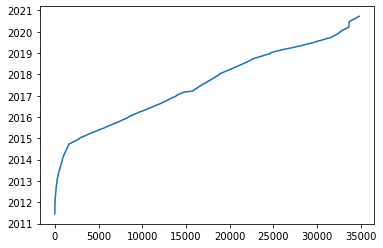

In [212]:
plt.plot(np.sort(full_df.CASE_DATE.values))

In [213]:
full_df.to_pickle(DATA_DIR / 'postdoc_salary_df.pickle')

In [214]:
full_df[:3]

,JOB_TITLE,SOC_TITLE,FULL_TIME_POSITION,CASE_SUBMITTED,PERIOD_OF_EMPLOYMENT_START_DATE,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,EMPLOYER_CITY,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,EMPLOYER_COUNTRY,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_WAGE_LEVEL,PUBLIC_DISCLOSURE,CASE_DATE,dataset,BASE_SALARY,SOC_NAME,EMPLOYMENT_START_DATE,RECEIVED_DATE,BEGIN_DATE,EMPLOYER_POC_LAST_NAME,EMPLOYER_POC_FIRST_NAME,EMPLOYER_POC_JOB_TITLE,WAGE_RATE_OF_PAY,INFLACTION_SCALED_BASE_SALARY
48938,POSTDOCTORAL RESEARCHER,MARKET RESEARCH ANALYSTS AND MARKETING SPECIAL...,Y,2019-04-19 12:23:24,2019-08-15 00:00:00,TRUSTEES OF THE UNIVERSITY OF PENNSYLVANIA,UNIVERSITY OF PENNSYLVANIA,PHILADELPHIA,PA,19104,UNITED STATES OF AMERICA,Philadelphia,Philadelphia,PENNSYLVANIA,19104,68978.5,NaN,Year,43160.0,Year,Level I,PLACE OF BUSINESS,2019-04-19 12:23:24,2020Q4,68978.5,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,68978.5
49510,POSTDOCTORAL FELLOW RESEARCH ASSOCIATE,MARKET RESEARCH ANALYSTS AND MARKETING SPECIAL...,Y,2019-06-18 09:09:18,2019-08-01 00:00:00,TEMPLE UNIVERSITY--A COMMONWEALTH UNIVERSITY,TEMPLE UNIVERSITY,PHILADELPHIA,PA,19122,UNITED STATES OF AMERICA,Philadelphia,Philadelphia,PENNSYLVANIA,19122,60000.0,NaN,Year,43160.0,Year,Level I,PLACE OF BUSINESS,2019-06-18 09:09:18,2020Q4,60000.0,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,60000.0
77188,POSTDOCTORAL RESEARCH ASSOCIATE,"COMPUTER PROGRAMMERS, R&D",Y,2019-03-15 09:05:46,2019-06-01 00:00:00,RENSSELAER POLYTECHNIC INSTITUTE,NaN,TROY,NY,12180,UNITED STATES OF AMERICA,Troy,Rensselaer,NEW YORK,12180,50000.0,NaN,Year,46883.0,Year,Level I,PLACE OF BUSINESS,2019-03-15 09:05:46,2020Q4,50000.0,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,50000.0


In [119]:
{i:np.mean(full_df[i].isnull()) for i in full_df.columns}

{'JOB_TITLE': 0.0,
 'SOC_TITLE': 0.6007355476382025,
 'FULL_TIME_POSITION': 0.15820020687277325,
 'PERIOD_OF_EMPLOYMENT_START_DATE': 0.6973911044707505,
 'EMPLOYER_NAME': 0.0,
 'EMPLOYER_BUSINESS_DBA': 0.8944948856453281,
 'EMPLOYER_CITY': 0.0,
 'EMPLOYER_STATE': 0.0,
 'EMPLOYER_POSTAL_CODE': 0.0,
 'EMPLOYER_COUNTRY': 0.0781519365590162,
 'WORKSITE_CITY': 0.0,
 'WORKSITE_COUNTY': 0.005114354671876796,
 'WORKSITE_STATE': 0.0,
 'WORKSITE_POSTAL_CODE': 0.0,
 'WAGE_RATE_OF_PAY_FROM': 0.15394782208941502,
 'WAGE_RATE_OF_PAY_TO': 0.425094816687737,
 'WAGE_UNIT_OF_PAY': 0.0,
 'PREVAILING_WAGE': 0.05338466842891622,
 'PW_UNIT_OF_PAY': 0.0534134007585335,
 'PW_WAGE_LEVEL': 0.34059303528330076,
 'PUBLIC_DISCLOSURE': 0.6517641650385013,
 'BASE_SALARY': 0.0,
 'SOC_NAME': 0.3992644523617975,
 'EMPLOYMENT_START_DATE': 0.3992644523617975,
 'BEGIN_DATE': 0.903344443167452,
 'EMPLOYER_POC_LAST_NAME': 0.903344443167452,
 'EMPLOYER_POC_FIRST_NAME': 0.903344443167452,
 'EMPLOYER_POC_JOB_TITLE': 0.90334444

In [215]:
n_postdocs = pd.DataFrame(np.unique(full_df.EMPLOYER_NAME.values, return_counts=True)).T
n_postdocs.columns = ['EMPLOYER', "COUNT"]
n_postdocs = n_postdocs.sort_values(by='COUNT', ascending=False)

In [216]:
n_postdocs[:20]

,EMPLOYER,COUNT
834,UNIVERSITY OF MICHIGAN,1141
890,"UT-BATTELLE, LLC (OAK RIDGE NATIONAL LABORATORY)",731
394,NORTHWESTERN UNIVERSITY,623
319,MASSACHUSETTS INSTITUTE OF TECHNOLOGY,616
803,"UNIVERSITY OF CALIFORNIA, SAN FRANCISCO",590
47,BAYLOR COLLEGE OF MEDICINE,577
1003,YALE UNIVERSITY,544
701,TRUSTEES OF THE UNIVERSITY OF PENNSYLVANIA,534
617,THE JOHNS HOPKINS UNIVERSITY,511
798,"UNIVERSITY OF CALIFORNIA, DAVIS",498


In [235]:
n_postdocs[np.array([True if "Massachusetts" in i else False for i in n_postdocs.EMPLOYER.values])]

,EMPLOYER,COUNT
355,Massachusetts Institute of Technology,52
917,University of Massachusetts Medical School,15
916,University of Massachusetts Amherst,3
760,The University of Massachusetts Medical School,1


In [224]:
harvard_salaries = full_df[full_df.EMPLOYER_NAME == 'HARVARD UNIVERSITY'].INFLACTION_SCALED_BASE_SALARY.values

In [219]:
len(harvard_salaries)

468

In [220]:
np.median(harvard_salaries)

53272.865005734646

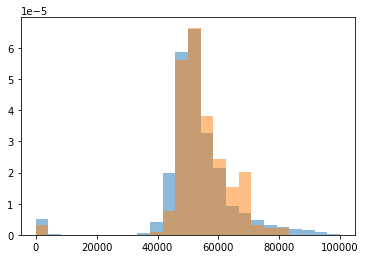

In [221]:
plt.hist(full_df['INFLACTION_SCALED_BASE_SALARY'].values, bins = np.linspace(0, 100000, 25), density=True, alpha = 0.5);
plt.hist(harvard_salaries, bins = np.linspace(0, 100000, 25), density=True, alpha= 0.5);

In [254]:
[i for i in n_postdocs.EMPLOYER.values if 'michigan state' in i.lower()]

['UNIVERSITY OF MICHIGAN',
 'University of Michigan',
 'MICHIGAN TECHNOLOGICAL UNIVERSITY',
 'CENTRAL MICHIGAN UNIVERSITY',
 'Michigan Technological University',
 'MICHIGAN BLUEBERRY GROWERS ASSOCIATION']

In [241]:
[i for i in n_postdocs.EMPLOYER.values if 'ohio' in i.lower()]

['THE OHIO UNIVERSITY',
 'NORTHEAST OHIO MEDICAL UNIVERSITY',
 'The Ohio University',
 'OHIO UNIVERSITY',
 'THE OHIO STATE UNIVERSITY']

In [242]:
[i for i in n_postdocs.EMPLOYER.values if 'Virginia' in i]

['Virginia Commonwealth University',
 'Virginia Polytechnic Institute & State University',
 'West Virginia University Research Corporation',
 'West Virginia State University Research and Development Corporation']

In [253]:
n_postdocs[n_postdocs.EMPLOYER == 'THE OHIO STATE UNIVERSITY']

,EMPLOYER,COUNT
628,THE OHIO STATE UNIVERSITY,1
